<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/Descen_Grad_Nasterov_Aula_B_28_18_OCT_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

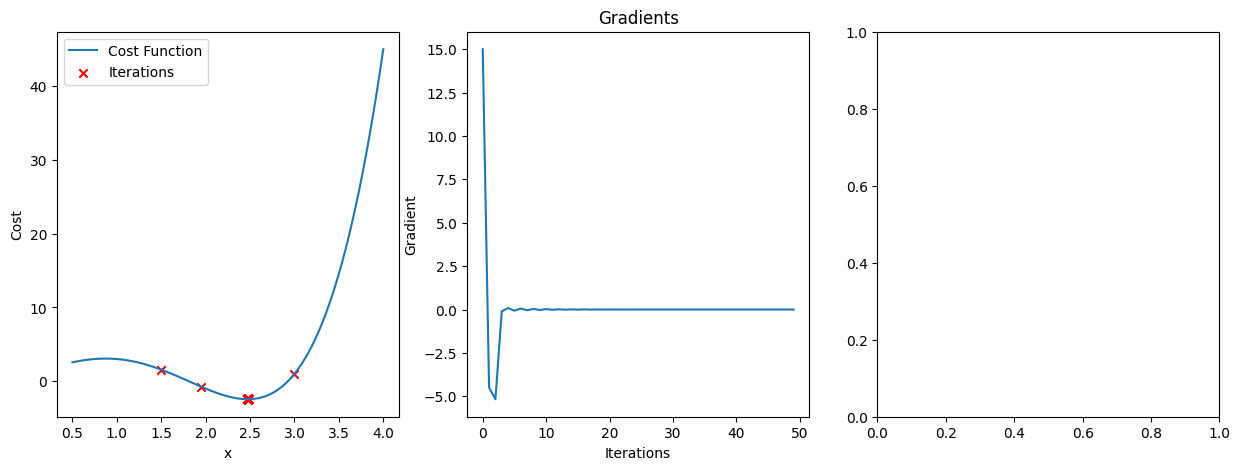

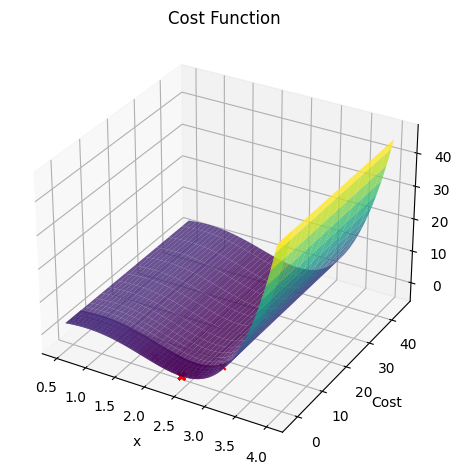

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir una función de costo (puedes cambiarla por la que desees)
def cost_function(x):
    return x**4 - 4*x**3 + 2*x**2 + 3*x + 1

# Calcular el gradiente de la función de costo
def gradient(x):
    return 4*x**3 - 12*x**2 + 4*x + 3

# Inicializar parámetros
learning_rate = 0.1
momentum = 0.9
num_iterations = 50
x = 3  # Valor inicial de x

# Listas para almacenar datos de seguimiento
x_values = []
cost_values = []
gradient_values = []

for i in range(num_iterations):
    x_values.append(x)
    cost = cost_function(x)
    cost_values.append(cost)
    grad = gradient(x)
    gradient_values.append(grad)

    # Calcular el valor adelantado (lookahead)
    lookahead_x = x - learning_rate * (momentum * grad)

    # Actualizar x usando el lookahead
    x -= learning_rate * grad

# Gráficas
plt.figure(figsize=(15, 5))

# Gráfica de la función de costo con valores de descenso
plt.subplot(1, 3, 1)
x_range = np.linspace(min(x_values) - 1, max(x_values) + 1, 100)
plt.plot(x_range, cost_function(x_range), label="Cost Function")
plt.scatter(x_values, cost_values, c='r', marker='x', label="Iterations")
plt.xlabel('x')
plt.ylabel('Cost')
plt.legend()

# Gráfica de los gradientes
plt.subplot(1, 3, 2)
plt.plot(gradient_values)
plt.xlabel('Iterations')
plt.ylabel('Gradient')
plt.title('Gradients')

# Gráfica de la función de costo 3D
plt.subplot(1, 3, 3)
from mpl_toolkits.mplot3d import Axes3D

x_range = np.linspace(min(x_values) - 1, max(x_values) + 1, 100)
cost_range = cost_function(x_range)
X, Y = np.meshgrid(x_range, cost_range)
Z = cost_function(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.scatter(x_values, cost_values, cost_function(np.array(x_values)), c='r', marker='x', label="Iterations")
ax.set_xlabel('x')
ax.set_ylabel('Cost')
ax.set_zlabel('Cost Function')
ax.set_title('Cost Function')

plt.tight_layout()
plt.show()
